In [3]:
# Import Dependencies
import os
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Path to data set in a variable
data_file = os.path.join(os.getcwd(), 'ohio_mn_col_compare.csv')
data_file2 = os.path.join(os.getcwd(), 'census_data_more.csv')

In [15]:
# Use Pandas to read data
data_file_df = pd.read_csv(data_file)
data_file_df.head()

,Type,National Average,MN,Ohio
0,Food,904.526511,932.501558,895.481246
1,Health Care,481.364922,512.090343,466.923974
2,Housing,1083.586495,976.204050,834.361601
3,Transport,810.855911,794.956776,794.638793
4,Other,485.961939,522.539720,481.102320


In [6]:
# Using .rename(columns={}) in order to rename columns
renamed_df = data_file_df.rename(columns={"MN":"Minnesota"})
renamed_df.head()

,Type,National Average,Minnesota,Ohio
0,Food,904.526511,932.501558,895.481246
1,Health Care,481.364922,512.090343,466.923974
2,Housing,1083.586495,976.204050,834.361601
3,Transport,810.855911,794.956776,794.638793
4,Other,485.961939,522.539720,481.102320


In [7]:
# # # Use Map to format all the columns
# data_file_df["MN"] = data_file_df["MN"].map("${:.2f}".format)
# data_file_df["Ohio"] = data_file_df["Ohio"].map("${:.2f}".format)
# data_file_df["National Average"] = data_file_df["National Average"].map("${:.2f}".format)
# data_file_df


In [8]:
data_file_df.dtypes

Type                 object
National Average    float64
MN                  float64
Ohio                float64
dtype: object

In [9]:
data_file_df["National Average"]=data_file_df["National Average"].astype(float)
data_file_df["MN"]=data_file_df["MN"].astype(float)
data_file_df["Ohio"]=data_file_df["Ohio"].astype(float)

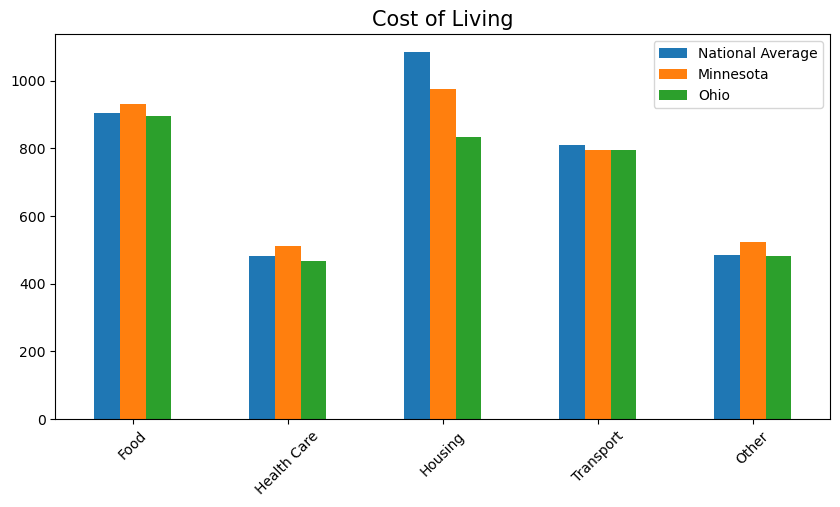

In [10]:
x_axis = np.arange(len(renamed_df))

multi_plot = renamed_df.plot(kind="bar", figsize=(10,5))
multi_plot.set_xticklabels(renamed_df["Type"], rotation=45)
plt.title("Cost of Living",fontsize=15)
plt.savefig("col.png")

plt.show()


In [16]:
# Use Pandas to read data
comp_df = pd.read_csv(data_file2)
comp_df.head()

,Name,Population,B19001_001E,Median Household Income,Aggregate Income,Aggregate Household Income,Ratio of Income to Poverty Level,Median Value,Earnings,Wage or Salary Income,...,Supplemental Income,Public Assistance Income,Public Assistance or Food Stamp/SNAP Income,Retirement Income,Other Types of Income,Aggregate Earnings for Households,Value,Selected Monthly Owner Costs,Monthly Housing Costs,State
0,Alabama,5039877.0,1967559.0,53913.0,1.542611e+11,1.493825e+11,4920613.0,172800.0,1967559.0,1967559.0,...,1967559.0,1967559.0,1967559.0,1967559.0,1967559.0,1.061057e+11,1377932.0,1377932.0,1967559.0,1
1,Puerto Rico,3263584.0,1165982.0,22237.0,4.721860e+10,4.133695e+10,3235303.0,114100.0,1165982.0,1165982.0,...,1165982.0,1165982.0,1165982.0,1165982.0,1165982.0,2.413150e+10,800555.0,800555.0,1165982.0,72
2,Arizona,7276316.0,2817723.0,69056.0,2.640942e+11,2.625475e+11,7126930.0,336300.0,2817723.0,2817723.0,...,2817723.0,2817723.0,2817723.0,2817723.0,2817723.0,1.856334e+11,1905690.0,1905690.0,2817723.0,4
3,Arkansas,3025891.0,1183675.0,52528.0,8.851379e+10,8.655705e+10,2944289.0,162300.0,1183675.0,1183675.0,...,1183675.0,1183675.0,1183675.0,1183675.0,1183675.0,6.107493e+10,793038.0,793038.0,1183675.0,5
4,California,39237836.0,13429063.0,84907.0,1.663512e+12,1.624283e+12,38481790.0,648100.0,13429063.0,13429063.0,...,13429063.0,13429063.0,13429063.0,13429063.0,13429063.0,1.214226e+12,7502706.0,7502706.0,13429063.0,6


In [17]:
# Filter by rows "Minnesota"and "Ohio"
comp_df2 = comp_df.apply(lambda row: row[comp_df['Name'].isin(['Minnesota','Ohio'])])
comp_df2

,Name,Population,B19001_001E,Median Household Income,Aggregate Income,Aggregate Household Income,Ratio of Income to Poverty Level,Median Value,Earnings,Wage or Salary Income,...,Supplemental Income,Public Assistance Income,Public Assistance or Food Stamp/SNAP Income,Retirement Income,Other Types of Income,Aggregate Earnings for Households,Value,Selected Monthly Owner Costs,Monthly Housing Costs,State
23,Minnesota,5707390.0,2281033.0,77720.0,2.382989e+11,2.356419e+11,5587189.0,285400.0,2281033.0,2281033.0,...,2281033.0,2281033.0,2281033.0,2281033.0,2281033.0,1.783962e+11,1665101.0,1665101.0,2281033.0,27
35,Ohio,11780017.0,4832922.0,62262.0,4.136991e+11,4.087312e+11,11470517.0,180200.0,4832922.0,4832922.0,...,4832922.0,4832922.0,4832922.0,4832922.0,4832922.0,2.985310e+11,3246486.0,3246486.0,4832922.0,39


In [18]:
comp_df3 = comp_df2.filter(items=['Name', 'Median Household Income','Median Value','Wage or Salary Income'])
comp_df3

,Name,Median Household Income,Median Value,Wage or Salary Income
23,Minnesota,77720.0,285400.0,2281033.0
35,Ohio,62262.0,180200.0,4832922.0


In [19]:
comp_df3.dtypes

Name                        object
Median Household Income    float64
Median Value               float64
Wage or Salary Income      float64
dtype: object

In [20]:
# Seting x axis and tick_locations
x_axis = np.arange(len(comp_df3))
tick_locations = [value for value in x_axis]

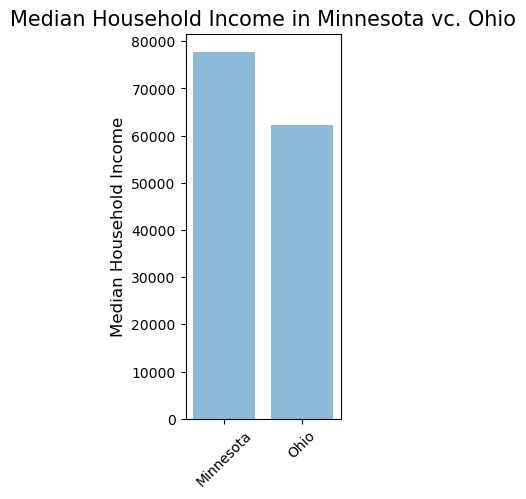

In [21]:
# Creating ploats

plt.figure(figsize=(2,5))
plt.bar(x_axis, comp_df3["Median Household Income"], alpha=0.5, align="center")
plt.xticks(tick_locations, comp_df3["Name"], rotation=45)
plt.title("Median Household Income in Minnesota vc. Ohio", fontsize=15)
plt.ylabel("Median Household Income",fontsize=12)
plt.savefig("mhi.png")

plt.show()

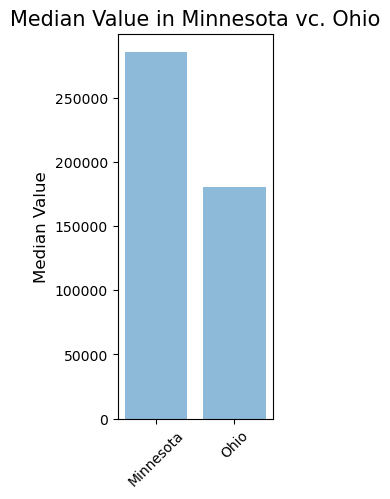

In [22]:
plt.figure(figsize=(2,5))
plt.bar(x_axis, comp_df3["Median Value"], alpha=0.5, align="center")
plt.xticks(tick_locations, comp_df3["Name"], rotation=45)
plt.title("Median Value in Minnesota vc. Ohio", fontsize=15)
plt.ylabel("Median Value", fontsize=12)
plt.savefig("mv.png")


plt.show()

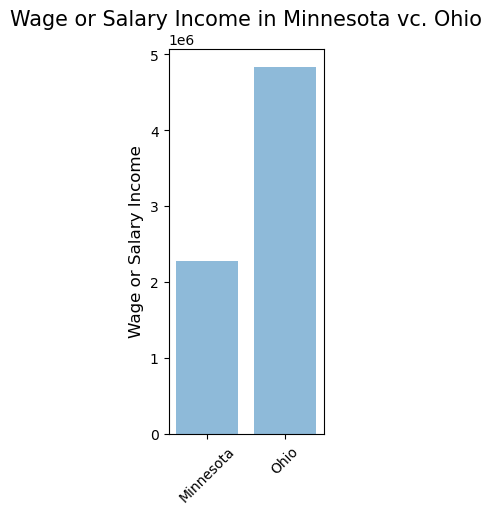

In [23]:
plt.figure(figsize=(2,5))
plt.bar(x_axis, comp_df3["Wage or Salary Income"], alpha=0.5, align="center")
plt.xticks(tick_locations, comp_df3["Name"], rotation=45)
plt.title("Wage or Salary Income in Minnesota vc. Ohio", fontsize=15)
plt.ylabel("Wage or Salary Income", fontsize=12)
plt.savefig("WoSI.png")


plt.show()